<a href="https://colab.research.google.com/github/ezrafield/hoanglong.github.io/blob/gh-pages/01_Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nguồn: https://phamdinhkhanh.github.io/2019/01/07/Ky_thuat_feature_engineering.html

# 1. Gồm 3 loại
Extract-Transform- Select
- Trích lọc Feature:

Chẳng hạn như trong các mô hình chuỗi thời gian chúng ta thường sử dụng kĩ thuật phân rã thời gian để trích lọc ra các đặc trưng như Ngày thành Năm, Tháng, Quí,…. Các đặc trưng mới sẽ giúp phát hiện các đặc tính chu kì và mùa vụ, những đặc tính mà thường xuất hiện trong các chuỗi thời gian.
- Biến đổi Feature:  
Biến đổi dữ liệu gốc thành những dữ liệu phù hợp với mô hình nghiên cứu
 - Chuẩn hóa và thay đổi phân phối :  các kĩ thuật feature scaling như Minmax scaling, Mean normalization, Unit length scaling, Standardization.
 - Tạo biến tương tác: Trong thống kê các bạn hẳn còn nhớ kiểm định ramsey reset test về mô hình có bỏ sót biến quan trọng? Thông qua việc thêm vào mô hình các biến bậc cao và biến tương tác để tạo ra một mô hình mới và kiểm tra hệ số các biến mới có ý nghĩa thống kê hay không. Ý tưởng của tạo biến tương tác cũng gần như thế. Tức là chúng ta sẽ tạo ra những biến mới là các biến bậc cao và biến tương tác.
 - Xử lý dữ liệu missing: Đối với biến numeric, các phương pháp đơn giản nhất là thay thế bằng mean, median,…. Một số kĩ thuật cao cấp hơn sử dụng phân phối ngẫu nhiên để fill các giá trị missing dựa trên phân phối của các giá trị đã biết hoặc sử dụng phương pháp simulate missing value dựa trên trung bình của các quan sát láng giềng. Đối với dữ liệu category, missing value có thể được giữ nguyên như một class độc lập hoặc gom vào các nhóm khác có đặc tính phân phối trên biến mục tiêu gần giống.
- Lựa chọn Feature:  ranking các biến theo mức độ quan trọng bằng các mô hình như Random Forest, Linear Regression, Neural Network, SVD,…; Sử dụng chỉ số IV trong scorecard; Sử dụng các chỉ số khác như AIC hoặc Pearson Correlation, phương sai. Chúng ta có thể phân chia các phương pháp trên thành 3 nhóm:
 - Cách tiếp cận theo phương pháp thống kê: Sử dụng tương quan Pearson Correlation, AIC, phương sai, IV.
 - Lựa chọn đặc trưng bằng sử dụng mô hình: Random Forest, Linear Regression, Neural Network, SVD.
 - Lựa chọn thông qua lưới (grid search): Coi số lượng biến như một thông số của mô hình. Thử nghiệm các kịch bản với những số lượng biến khác nhau. Các bạn có thể xem cách thực hiện grid search.

### Ví dụ
chúng ta sẽ sử dụng dữ liệu trong cuộc thi của thi Two Sigma Connect: Rental Listing Inquiries Kaggle competition. File train.json là dữ liệu training. Bài toán của chúng ta là cần dự báo mức độ tín nhiệm của một danh sách những người thuê mới. Chúng ta phân loại danh sách thành 3 cấp độ [‘low’, ‘medium’, ‘high’]. Để đánh giá kết quả chúng ta sử dụng hàm trung bình sai số rmse.

In [1]:
ua import json
import pandas as pd

with open('../input/train.json', 'r') as iodata:
    data = json.load(iodata)
    dataset = pd.DataFrame(data)
    
dataset.head()

SyntaxError: ignored

# 2. Trích lọc đặc trưng

## 2.1. Trích lọc đặc trưng văn bản

Kĩ thuật mã hóa (tokenization): Mã hóa đơn giản là việc chúng ta chia đoạn văn thành các câu văn, các câu văn thành các từ. Trong mã hóa thì từ là đơn vị cơ sở. Chúng ta cần một bộ tokenizer có kích thước bằng toàn bộ các từ xuất hiện trong văn bản hoặc bằng toàn bộ các từ có trong từ điển. Một câu văn sẽ được biểu diễn bằng một sparse vector mà mỗi một phần tử đại diện cho một từ, giá trị của nó bằng 0 hoặc 1 tương ứng với từ không xuất hiện hoặc có xuất hiện.
Chúng ta sử dụng các túi từ (bags of words) để tạo ra một vector có độ dài bằng độ dài của tokenizer và mỗi phần tử của túi từ sẽ đếm số lần xuất hiện của một từ trong câu và sắp xếp chúng theo một vị trí phù hợp trong vector.



In [9]:
from functools import reduce
import numpy as np

# test  3 sentences:
texts = [['i', 'have', 'a', 'cat'],
         ['he','have','a','cat'],
         ['he','and','i','have','a','cat','and','a','dog']]

dictionary = list(enumerate(set(reduce(lambda x,y: x+y, texts))))
# lambda: lam voi tung ptu cua list,, quan he cac ptu
# reduce: lam voi tung ptu cua list, ap dung function
# set: tao 1 list cac ptu
# enumerate: danh so thu tu tung ptu
def bag_of_word(sentence):
  vector = np.zeros(len(dictionary))
  for i, word in dictionary:
    count = 0
    for w in sentence:
      if w == word:
        count += 1
    vector[i] = count
  return vector
for i in texts:
  print(bag_of_word(i))

[1. 0. 1. 1. 1. 0. 0.]
[1. 0. 0. 1. 1. 0. 1.]
[1. 2. 1. 1. 2. 1. 1.]


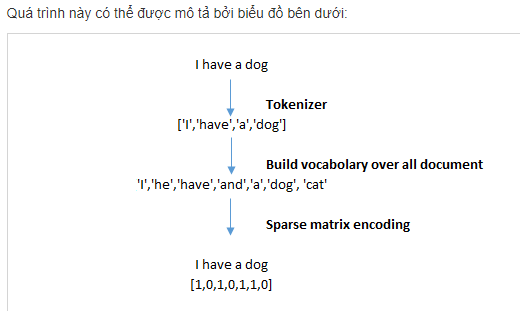![image.png]

### hạn chế: 
không phân biệt được 2 câu văn có cùng các từ bởi túi từ không phân biệt thứ tự trước sau của các từ trong một câu

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range= (1,1))
vect.fit_transform([' you have no dog', 'no, you have dog']).toarray()
vect.vocabulary_

{'dog': 0, 'have': 1, 'no': 2, 'you': 3}

In [11]:
vect = CountVectorizer(ngram_range= (1,2))
vect.fit_transform(['you have no dog','no, you have dog']).toarray()
vect.vocabulary_

{'dog': 0,
 'have': 1,
 'have dog': 2,
 'have no': 3,
 'no': 4,
 'no dog': 5,
 'no you': 6,
 'you': 7,
 'you have': 8}

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import euclidean

vect = CountVectorizer(ngram_range = (3,3), analyzer= 'char_wb')
n1,n2,n3,n4 = vect.fit_transform(['andersen','peterson','petrov','smith']).toarray()
euclidean(n1,n2), euclidean(n2,n3), euclidean(n3,n4)

(3.7416573867739413, 3.1622776601683795, 3.3166247903554)

những từ hiếm (corpus) nhưng quan trọng cần được tăng trọng số. Cách tiếp cận này được gọi là TF-IDF (Term Frequency - Inverse Document Frequency)

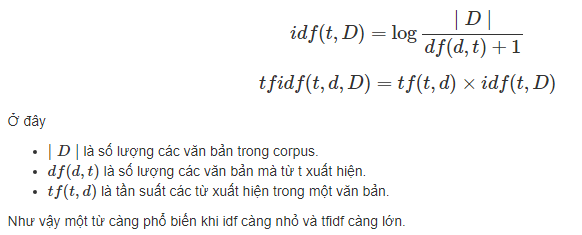

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
 	'tôi thích ăn bánh mì nhân thịt',
	'cô ấy thích ăn bánh mì, còn tôi thích ăn xôi',
	'thị trường chứng khoán giảm làm tôi lo lắng',
	'chứng khoán sẽ phục hồi vào thời gian tới. danh mục của tôi sẽ tăng trở lại',
  'dự báo thời tiết hà nội có mưa vào chiều và tối. tôi sẽ mang ô khi ra ngoài'
]

vectorizer = TfidfVectorizer(max_df = 0.9)
# Tham số max_df để loại bỏ các từ stopwords xuất hiện ở hơn 90% các câu.
X = vectorizer.fit_transform(corpus)
print('word in dictionary')
print(vectorizer.get_feature_names_out())
print('X shape:', X.shape)


word in dictionary
['bánh' 'báo' 'chiều' 'chứng' 'còn' 'có' 'cô' 'của' 'danh' 'dự' 'gian'
 'giảm' 'hà' 'hồi' 'khi' 'khoán' 'lo' 'làm' 'lại' 'lắng' 'mang' 'mì' 'mưa'
 'mục' 'ngoài' 'nhân' 'nội' 'phục' 'ra' 'sẽ' 'thích' 'thị' 'thịt' 'thời'
 'tiết' 'trường' 'trở' 'tăng' 'tối' 'tới' 'và' 'vào' 'xôi' 'ăn' 'ấy']
X shape: (5, 45)


Ta có thể thấy từ tôi xuất hiện ở toàn bộ các câu và không mang nhiều ý nghĩa của chủ đề của câu nên có thể coi là một stopword. Bằng phương pháp lọc cận trên của tần suất xuất hiện từ trong văn bản là 90% ta đã loại bỏ được từ này khỏi dictionary.

Word2Vec là 1 trường hợp đặc biệt của phương pháp này, không chỉ vector hóa không gian đa chiều mà còn so sánh tương tư ngữ nghĩa.

Ví dụ: king -man + woman = queen

Lưu ý rằng mô hình này không hiểu ý nghĩa của các từ mà chỉ cố gắng định vị các vectơ sao cho các từ được sử dụng trong ngữ cảnh chung gần nhau.

Các mô hình như vậy cần phải được đào tạo trên các tập dữ liệu rất lớn để các tọa độ vectơ nắm bắt được các ngữ nghĩa

tương tự cũng có food2Vec trong tin sinh

## 2.2 Trích lọc đặc trưng trong xử lí ảnh
Thường ứng dụng các mô hình pretrained đã có, nhưng khó xây dựng một mô hình mới (đòi hỏi đào sâu)

Từ các low-level như xác định góc, biên giới của các khu vực, thống kê phân phối màu sắc, v.v. Các chuyên gia có thể đưa ra rất nhiều điểm tương đồng giữa các phương pháp cũ và mạng nơron; đặc biệt là các mạng nơ ron tích chập hiện đại như Haar cascades.

Thông thường trong lĩnh vực computer vision chúng ta sẽ sử dụng mạng nơ-ron tích chập (CNN). Không cần phải tìm ra kiến trúc và train lại từ đâu. Thay vào đó dùng pretrained, thường chỉ điều chỉnh bằng cách "tách" các lớp kết nối đầy đủ (fully connected layers) cuối cùng, thêm các lớp mới cho nhiệm vụ cụ thể và train lại theo dữ liệu mới. Nếu chỉ muốn vector hóa hình ảnh, chỉ cần loại lớp cuối cùng

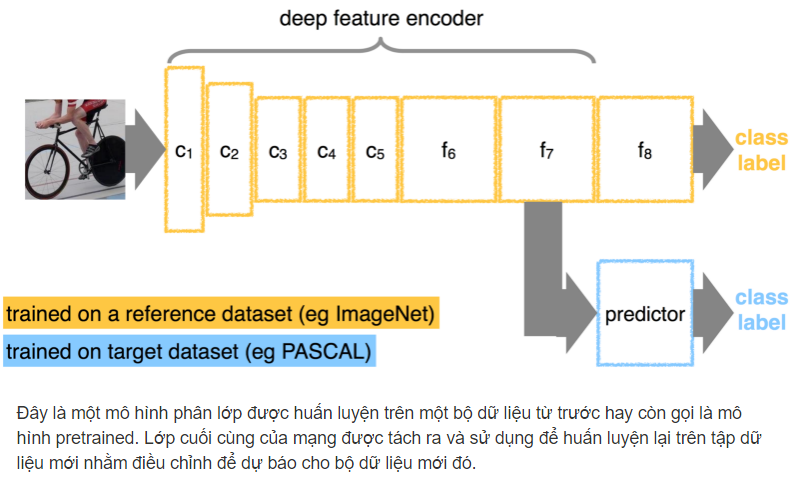

Tuy nhiên, chúng ta sẽ không tập trung quá nhiều vào kỹ thuật mạng nơ ron. Thay vào đó các feature được tạo thủ công vẫn rất hữu ích: ví dụ đối với bài toán trong cuộc thi Rental Listing Inquiries Kaggle Competition, để dự đoán mức độ phổ biến của danh sách cho thuê, ta có thể giả định rằng các căn hộ có ánh sáng sẽ thu hút nhiều sự chú ý hơn và tạo một feature mới như “giá trị trung bình của pixel”. Bạn có thể tìm thấy một số ví dụ thú vị trong tài liệu về PIL.

Nếu có văn bản trên hình ảnh, bạn có thể đọc nó để khai thác một số thông tin thông qua gói phát hiện văn bản trong hình ảnh pytesseract.

In [17]:
import sys
!{sys.executable} -m pip install pytesseract

!{sys.executable} -m pip install tesseract


In [18]:
import sys


from pytesseract import image_to_string
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

img = 'http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg'
img = requests.get(img)
img = Image.open(BytesIO(img.content))

#show image
img_arr = np.array(img)
plt.imshow(img_arr)

AttributeError: ignored

In [ ]:
img2 = requests.get('https://photos.renthop.com/2/8393298_6acaf11f030217d05f3a5604b9a2f70f.jpg')
img2 = Image.open(BytesIO(img2.content))
img2 = np.array(img2)
plt.imshow(img2)

## 2.3. Thông tin địa lí
Trong python chúng ta có một package khá phổ biến trong việc khai thác các thông tin địa lý đó là reverse_geocoder

Có 2 dạng bài toán chính với thông tin địa lý gồm geocoding: mã hóa một tọa độ địa lý từ một địa chỉ và revert geocoding: từ thông tin cung cấp về kinh độ và vĩ độ trả về địa chỉ của địa điểm và các thông tin có liên quan. Cả hai bài toán đều có thể giải quyết thông qua API của google map hoặc OpenStreetMap.

In [19]:
!pip install reverse_geocoder


     |████████████████████████████████| 2.2 MB 6.9 MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=05fdcd238dcb340118846ff74e6e9a51918d53203100fa451ff5486052dadd5e
  Stored in directory: /root/.cache/pip/wheels/34/6e/70/5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder


In [20]:
import reverse_geocoder as revgc
revgc.search((dataset.latitude[1], dataset.longitude[1]))

NameError: ignored

## 2.4. Dữ liệu thời gian
Trong dự báo, các dữ liệu thường có trạng thái thay đổi

Biến đổi One-hot coding là 1 phương pháp quan trọng được sử dụng để mã hóa các biến chu ki thời gian. One-hot coding biến đổi 1 biến thành các vector phần tử 0 và 1 (có và không có), tương tự như mã hóa sparse vector. Có thể xài hàm weekday( nhwung phải biến đổi dữ liệu sang dạng datetime (thông qua strftime (string format line)

In [21]:
# dataset['created'].apply(lambda x: x.date().weekday())
from datetime import datetime

def parser(x):
  return datetime.strftime(x, '%Y-%m-%d %H:%M:%S')

dataset['created'] = dataset['created'].map(lambda x: parser(x))

for i, k in zip(dataset.columns, dataset.dtypes):
  print('{}: {}'.format(i,k))


NameError: ignored

Như vậy biến created đã được chuyển về dạng datetime. Chúng ta có thể tạo ra một one-hot coding dựa vào hàm weekday().

In [22]:
# tương tự
dataset['weekday'] = dataset['created'].apply(lambda x: x.date().weekday())
print(dataset['weekday'].head())

NameError: ignored

Ta có thể tạo ra một biến trả về trạng thái ngày có phải là cuối tuần bằng kiểm tra weekday() có rơi vào [5, 6] hay không.

In [ ]:
dataset['is_weekend'] = dataset['created'].apply(lambda x: 1 if x.date().weekday() in [5,6] else 0)
print(dataset['is_weekend'][:5])

Hỏi đáp?

Q: Liệu các ngày nghỉ tết nguyên đán, quốc tế lao động, quốc khánh,… có đặc điểm gì chung không?

A: Chúng ta nên đưa những ngày này vào danh sách các ngày tiềm năng có bất thường dữ liệu.

### Chuỗi thời gian từ website, log ...
Các hệ thống website lớn sẽ tracking lại các session người dùng để dự đoán các thông tin. Để phân loại các thông tin có thể sử dụng package user_agents

In [23]:
!pip install user_agents

In [24]:
import user_agents
ua = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/56.0.2924.76 Chrome/56.0.2924.76 Safari/537.36'
# Parser thông tin user agent
ua = user_agents.parse(ua)
# Khai thác các thuộc tính của user
print('Is a bot? ', ua.is_bot)
print('Is mobile? ', ua.is_mobile)
print('Is PC? ',ua.is_pc)
print('OS Family: ',ua.os.family)
print('OS Version: ',ua.os.version)
print('Browser Family: ',ua.browser.family)
print('Browser Version: ',ua.browser.version)


Is a bot?  False
Is mobile?  False
Is PC?  True
OS Family:  Ubuntu
OS Version:  ()
Browser Family:  Chromium
Browser Version:  (56, 0, 2924)


# 3. Biến đổi dữ liệu (feature transformation)
Các dữ liệu thường có khác biệt đơn vị (scale), phân phối (distribution), tác động không nhỏ đến thuật toán trượt gradient. Một tập dữ liệu có đơn vị quá khác biệt thường khiến gradient không hội tụ tới cực trị toàn cucjm và cũng khiến các biến bị sai lệch nhiều hơn. Mottj biến có ảnh hưởng lớn (độ lớn của hệ số ước lượng) nhwung độ rộng miền giá trị nhỏ thì rất nhạy cảm dù thay đổi nhỏ đến biến mục tiêu. Dẫn đến cân điều chỉnh learning rate phù hợp độ lớn đơn vị từng biến, thiết kế như vậy rất phức tạp. Vậy cần đồng bộ khác biết đơn vị:

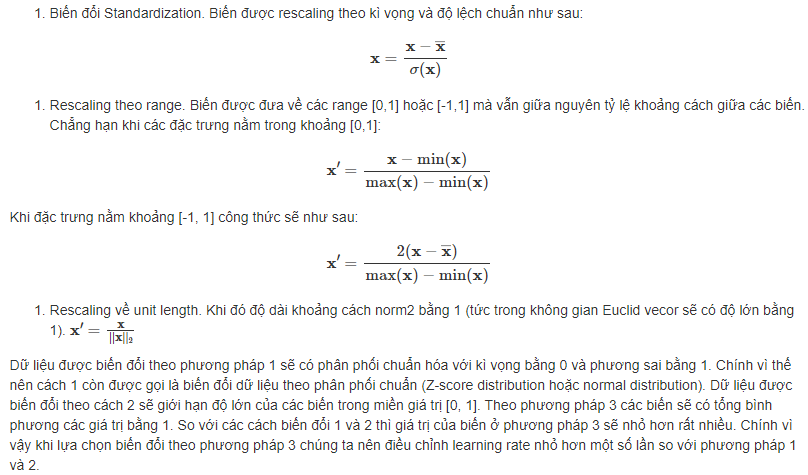

### Phân phối chuẩn

In [25]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta
from scipy.stats import shapiro
import statsmodels.api as sm
import numpy as np

#tạo chuỗi phân phối beta
data = beta(1,10).rvs(1000).reshape(-1,1)
print('data shape: %s'%str(data.shape))
shapiro(data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


data shape: (1000, 1)


(0.8655492067337036, 1.9988188094331367e-28)

In [26]:
shapiro(StandardScaler().fit_transform(data))

(0.8655490875244141, 1.9987765593449817e-28)

#### Theo range minmax


In [27]:
from sklearn.preprocessing import MinMaxScaler
price_mm = MinMaxScaler().fit_transform(price.reshape(-1,1))
print('Head of min max scaling price: \n', price_mm[:5])

NameError: ignored

#### Kiểm tra tính phân phối chuẩn bằng Q-Q plot
biểu diễn giá trị phân phối thực tế dựa trên giá trị phân phối lý thuyết. Nếu đường biểu diễn nằm sát đường chéo chính thì biến có khả năng cao đạt tính phân phối chuẩn

In [28]:
price_log = np.log(price)
sm.qqplot(price, loc = price.mean(), scale = price.std())

NameError: ignored

Trong biểu đồ qqplot ta nhận thấy các điểm nằm rời rạc ở phần đầu và đuôi của đồ thị là những dữ liệu outlier. Nếu ta loại bỏ những dữ liệu này sẽ tạo đồ thị có tính phân phối chuẩn cao hơn

In [29]:
price_rm_outlier = price_log[(price_log < 12) & (price_log > 6)]
sm.qqplot(price_rm_outlier, loc = price_rm_outlier.mean(), price_rm_outlier.std())

SyntaxError: ignored

# 4. Lựa chọn feature (feature selection)
 Bởi những hạn chế của việc có quá nhiều features đó là:
- Tăng chi phí tính toán.
- Quá nhiều biến giải thích có thể dẫn tới overfiting. Tức hiện tượng mô hình hoạt động rất tối trên tập train nhưng kém trên tập test.
- Trong số các biến sẽ có những biến gây nhiễu và làm giảm chất lượng mô hình.
- Rối loạn thông tin do không thể kiểm soát và hiểu hết các biến.

## 4.1. Phương pháp thống kê
Lựa chọn dựa trên phương sai. Các biến không biến động sẽ có khả năng giải thích kém hơn. Do đó ý tưởng chính là tính phương sai và loại bỏ nếu nhỏ hơn threshold

In [7]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification

X,y = make_classification()

print('X:', X[:5,:5])
print('y:',y)
print('X shape', X.shape)
print('y shape', y.shape)

X: [[-0.87054522  2.05793967  1.86503694  1.96640417 -1.59537331]
 [-0.60523042  0.01939314 -0.68963075  0.48878799  1.18227329]
 [ 1.54418906 -0.87319116 -1.8156074  -1.03790159  0.88307789]
 [ 0.86739217 -0.45327202 -1.28040939  1.2325337  -0.34227075]
 [ 0.70653681 -1.14004521  0.01014469  0.20436285 -0.12575105]]
y: [1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1]
X shape (100, 20)
y shape (100,)


nếu chọn 0.5 là ngưỡng threshold:

In [9]:
VarianceThreshold(.5).fit_transform(X).shape

(100, 20)

In [10]:
VarianceThreshold(.9).fit_transform(X).shape

(100, 14)

Nâng lên 0.9 thì còn 17 biến. Ngoài ra còn thể dựa trên các chỉ số X^2, F của phân phối Chi bình phương và Fisher. Các phương pháp này đo lường sức mạnh của mô hình khi loại bỏ lần lượt đến khi còn k biến tốt nhất

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_kbest = SelectKBest (f_classif, k=5).fit_transform(X,y)
X_kvar = VarianceThreshold((0.9)).fit_transform(X)
print('X shape after appling statistical selection', X_kbest.shape)
print('X shape after apply variance selection', X_kvar.shape)

X shape after appling statistical selection (100, 5)
X shape after apply variance selection (100, 14)


Chúng ta đánh giá hiệu quả bằng cross validation trước  với KFold = 5. Lưu ý quan trọng là khi so sánh hiệu quả các mô hình khác nhau trên 1 tập dữ liệu, ta luôn phải dùng cross validation thay vì chia dữ liệu ngẫu nhiên vì cross validation  cover hết tập dữ liệu và mô hinhd hồi quy n-1 folds dựa trên n folds.

In [11]:
logit = LogisticRegression(solver = 'lbfgs', random_state=1)

## 4.2. Sử dụng mô hình
Phương pháp thường xuyên áp dụng tại các cuộc thi phân tích dữ liệu. Dựa trên một số mô hình cơ sở để đánh giá mức độ quan trọng của các biến (thường là Random Forest hoặc Linear Regression)
- Ưu điểm: chuẩn xác
- Nhược điểm: xây mô hình rồi mới xác định biến quan trọng, trái thực tế lựa chọn biến trước khi training

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

rdFrt = RandomForestClassifier(n_estimators = 10, random_state=1 )
lnSVC = LinearSVC(C=0.01, penalty="l1", dual=False)
pipe1 = make_pipeline(StandardScaler(), SelectFromModel(estimator = rdFrt), logit)
pipe2 = make_pipeline(StandardScaler(), SelectFromModel(estimator = lnSVC), logit)

acc_log = cross_val_score(logit, X,y, scoring = 'accuracy', cv =5).mean()
acc_rdf = cross_val_score(rdFrt, X, y, scoring = 'accuracy', cv=5).mean()
acc_pip1 = cross_val_score(pipe1, X, y, scoring= 'accuracy', cv =5).mean()
acc_pip2 = cross_val_score(pipe2, X, y, scoring= 'accuracy', cv=5).mean()

print('Accuracy logit: ', acc_log)
print('Accuracy random forest: ', acc_rdf)
print('Accuracy pipeline 1: ',acc_pip1)
print('Accuracy pipeline 2: ',acc_pip2)

NameError: ignored

## 4.3. Sử dụng Grid search (Ensemble Learning?)
Có thể coi là phương pháp đáng tin cậy nhất cho việc lựa chọn biến quan trọng. Ý tưởng chính là huấn luyện trên tập dữ liệu con, lập lại trên những mẫu con khác, so sánh để chọn mô hình tốt nhất (Exhaustive Feature Selection).

Để tiết kiệm thời gian, cần giới hạn search space. Cố định trước N biến, đi qua lần lượt các kết hợp của N biến đó, lựa chọn kết quả tốt nhất. Khi xét N+1, dựa vào kết quả trước. Tiếp tục đến khi số lượng biến đạt tối đa hoặc loss function không giảm nữa (Sequential Feature Selection)

Ngược lại, có thể cố định 1 tập lướn nhất các biến, lần lượt loại dần đến khi mô hình không còn được cải thiện



In [3]:
!pip install mlxtend

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector
selector = SequentialFeatureSelector(logit, scoring ='accuracy', verbose = 2,
                                     k_features =3, forward = False, n_jobs= -1)
selector.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished

[2022-04-09 16:24:16] Features: 19/3 -- score: 0.8099999999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.4s finished

[2022-04-09 16:24:16] Features: 18/3 -- score: 0.82[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.4s finished

[2022-04-09 16:24:16] Features: 17/3 -- score: 0.8299999999999998[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2022-04-09 16:24:17] Features: 16/3 -- score: 0.8300000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2022-04-09 16

SequentialFeatureSelector(estimator=LogisticRegression(random_state=1),
                          forward=False, k_features=3, n_jobs=-1,
                          scoring='accuracy', verbose=2)

# 5. Nhận xét
Các phương pháp Feature Engineering:
- Trích lọc Feature: tracking từ các hệ thống, ứng dụng deep learning, phân rã thời gian, ...
- Biến đổi Feature: Minmax Scaling, Unit lenght Scaling, Standardization
- Lựa chọn Feature: phương pháp thống kê, mô hình hoặc grid Search

Q: Bên cạnh thuật toán, model, cần kiến thức chuyên môn (knowlegde domain) không?

A: có, rất quan trọng. Để nắm rõ các mối quan hệ thực tiễn, nên luôn cần BA tư vấn nghiệp vụ

Q:  trong mọi mô hình có nên thực hiện Feature Engineering?

A: Hầu hết

Q: ý tưởng Feature Engineering rất nhiều, làm thế nào tối ưu?

A: Chỉ có thể rút kinh nghiệm qua thử nghiệm với từng bài toán cụ thể